In [19]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans


In [ ]:
# 🪐 Load Data
df = pd.read_csv("../data/kepler_data_cleaned.csv")
df.head()

,koi_name,kepler_name,exoplanet_archive_disposition,disposition_using_kepler_data,ntl_fpflag,se_fpflag,co_fpflag,ec_fpflag,koi_period,koi_epoch,...,koi_prad,koi_eqtemp,koi_insol,koi_snr,koi_stefftemp,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,0,0,0,0,9.488036,170.538750,...,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0,0,0,0,54.418383,162.513840,...,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,K00753.01,NaN,CANDIDATE,CANDIDATE,0,0,0,0,19.899140,175.850252,...,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,...,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,0,0,0,0,2.525592,171.595550,...,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [4]:
# 👀 Basic Overview
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.info()
df.describe().T

Shape: (9564, 23)

Columns:
 ['koi_name', 'kepler_name', 'exoplanet_archive_disposition', 'disposition_using_kepler_data', 'ntl_fpflag', 'se_fpflag', 'co_fpflag', 'ec_fpflag', 'koi_period', 'koi_epoch', 'koi_param', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_eqtemp', 'koi_insol', 'koi_snr', 'koi_stefftemp', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   koi_name                       9564 non-null   object 
 1   kepler_name                    2747 non-null   object 
 2   exoplanet_archive_disposition  9564 non-null   object 
 3   disposition_using_kepler_data  9564 non-null   object 
 4   ntl_fpflag                     9564 non-null   int64  
 5   se_fpflag                      9564 non-null   int64  
 6   co_fpflag                      9564 non-null

,count,mean,std,min,25%,50%,75%,max
ntl_fpflag,9564.0,0.208595,4.767290,0.000000,0.000000,0.000000,0.000000,4.650000e+02
se_fpflag,9564.0,0.232748,0.422605,0.000000,0.000000,0.000000,0.000000,1.000000e+00
co_fpflag,9564.0,0.197512,0.398142,0.000000,0.000000,0.000000,0.000000,1.000000e+00
ec_fpflag,9564.0,0.120033,0.325018,0.000000,0.000000,0.000000,0.000000,1.000000e+00
koi_period,9564.0,75.671358,1334.744046,0.241843,2.733684,9.752831,40.715178,1.299958e+05
koi_epoch,9564.0,166.183251,67.918960,120.515914,132.761718,137.224595,170.694603,1.472522e+03
koi_param,9564.0,0.727586,3.284876,0.000000,0.209075,0.537000,0.877000,1.008060e+02
koi_duration,9564.0,5.621606,6.471554,0.052000,2.437750,3.792600,6.276500,1.385400e+02
koi_depth,9564.0,22904.322553,80790.197240,0.000000,166.800000,421.100000,1341.775000,1.541400e+06
koi_prad,9564.0,99.077250,3018.723391,0.080000,1.430000,2.390000,13.112500,2.003460e+05


In [7]:
# 🎯 Split features and target
X = df.drop(columns=["exoplanet_archive_disposition"])
y = df["exoplanet_archive_disposition"]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Select numeric features only
X = X.select_dtypes(include=["int64", "float64"])

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

In [9]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.2%}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Decision Tree


Decision Tree Accuracy: 89.13%
                precision    recall  f1-score   support

     CANDIDATE       0.79      0.71      0.75       405
     CONFIRMED       0.81      0.89      0.85       569
FALSE POSITIVE       0.99      0.97      0.98       939

      accuracy                           0.89      1913
     macro avg       0.86      0.86      0.86      1913
  weighted avg       0.89      0.89      0.89      1913



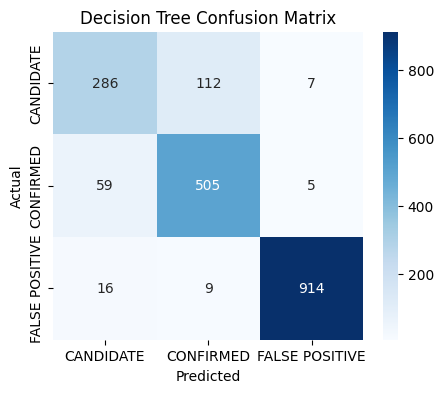

In [11]:
# 2️⃣ Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
evaluate_model("Decision Tree", dt, X_train, X_test, y_train, y_test)


In [14]:
# Drop rows with NAN values
df = df.dropna()

In [15]:
# 🎯 Split features and target
X = df.drop(columns=["exoplanet_archive_disposition"])
y = df["exoplanet_archive_disposition"]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Select numeric features only
X = X.select_dtypes(include=["int64", "float64"])

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

K Means Clustering

In [22]:
# numerical features only
numeric_df = df.select_dtypes(include=["int64", "float64"])

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

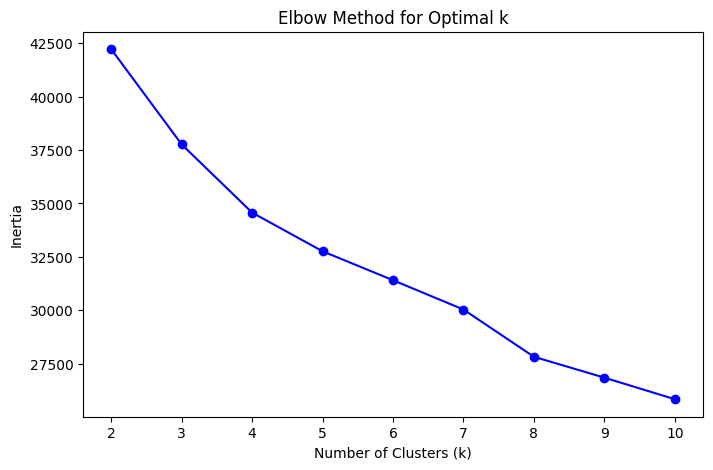

In [24]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
numeric_df['Cluster'] = clusters


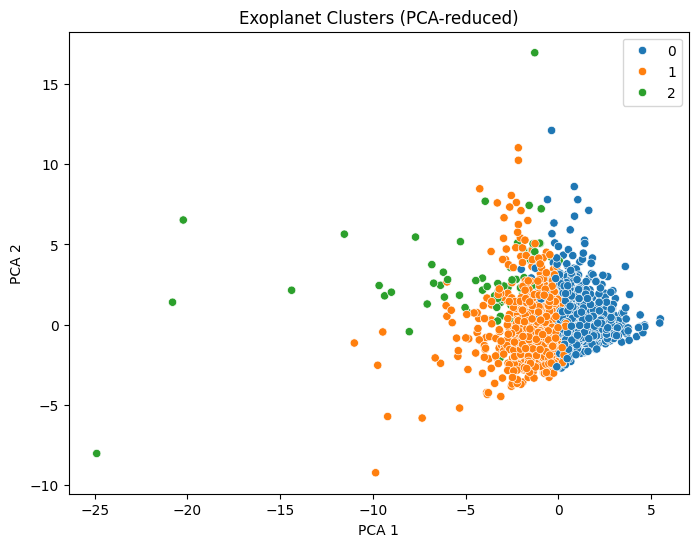

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='tab10')
plt.title('Exoplanet Clusters (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [30]:
# Group by cluster and see mean values for features
cluster_summary = numeric_df.groupby('Cluster').mean()
print(cluster_summary)


         ntl_fpflag  se_fpflag  co_fpflag  ec_fpflag  koi_period   koi_epoch  \
Cluster                                                                        
0          0.306983   0.000000        0.0        0.0   27.508209  161.082183   
1          0.000866   0.000000        0.0        0.0   27.443822  150.997871   
2          0.000000   0.205479        0.0        0.0   42.580214  170.945313   

         koi_param  koi_duration     koi_depth   koi_prad   koi_eqtemp  \
Cluster                                                                  
0         0.435080      3.593220    935.770487   2.387141   688.694335   
1         0.454393      5.072456    466.107619   2.723541  1003.017316   
2         0.337055      4.684533  12887.816438  14.901096  1091.260274   

           koi_insol      koi_snr  koi_stefftemp  koi_slogg  koi_srad  \
Cluster                                                                 
0         117.626337    44.904282    5159.457839   4.551721  0.807611   
1        